In [21]:
import pandas as pd

file_path = 'c:/users/samsung/python-data-analysis-master/data/chipotle.tsv'

chipo = pd.read_csv(file_path,sep='\t')

print(chipo.shape)
print('-'*50)
print(chipo.info())

(4622, 5)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [29]:
print(chipo.columns)
print('-'*80)
print(chipo.index)

chipo.head(10)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
--------------------------------------------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [39]:
chipo['order_id'] = chipo['order_id'].astype('str')

chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [50]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


In [55]:
item_count = chipo['item_name'].value_counts()[:10]
item_count

for idx, (val,cnt) in enumerate(item_count.iteritems(),1):
    print('Top',idx,':',val,cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [65]:
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [93]:
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

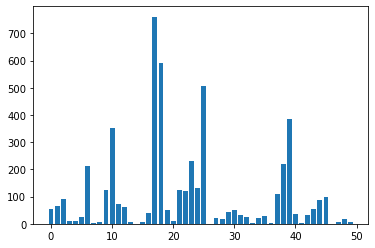

In [95]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list));
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.show()

In [119]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

TypeError: 'float' object is not subscriptable

In [120]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [130]:
a = []
def su(x):
    a.append(x)
chipo['item_price'].apply(lambda x: su(x))

a

[2.39,
 3.39,
 3.39,
 2.39,
 16.98,
 10.98,
 1.69,
 11.75,
 9.25,
 9.25,
 4.45,
 8.75,
 8.75,
 11.25,
 4.45,
 2.39,
 8.49,
 8.49,
 2.18,
 8.75,
 4.45,
 8.99,
 3.39,
 10.98,
 3.39,
 2.39,
 8.49,
 8.99,
 1.09,
 8.49,
 2.39,
 8.99,
 1.69,
 8.99,
 1.09,
 8.75,
 8.75,
 4.45,
 2.95,
 11.75,
 2.15,
 4.45,
 11.25,
 11.75,
 8.75,
 10.98,
 8.99,
 3.39,
 8.99,
 3.99,
 8.99,
 2.18,
 10.98,
 1.09,
 8.99,
 2.39,
 9.25,
 11.25,
 11.75,
 2.15,
 4.45,
 9.25,
 11.25,
 8.75,
 8.99,
 8.99,
 3.39,
 8.99,
 10.98,
 8.99,
 1.69,
 8.99,
 3.99,
 8.75,
 4.45,
 8.75,
 8.75,
 2.15,
 8.75,
 11.25,
 2.15,
 9.25,
 8.75,
 8.75,
 9.25,
 8.49,
 8.99,
 1.09,
 9.25,
 2.95,
 11.75,
 11.75,
 9.25,
 11.75,
 4.45,
 9.25,
 4.45,
 11.75,
 8.75,
 8.75,
 4.45,
 8.99,
 8.99,
 3.99,
 8.49,
 3.39,
 8.99,
 1.09,
 9.25,
 4.45,
 8.75,
 2.95,
 4.45,
 2.39,
 8.49,
 8.99,
 8.49,
 1.09,
 8.99,
 3.99,
 8.75,
 9.25,
 4.45,
 11.25,
 4.45,
 8.99,
 1.09,
 9.25,
 2.95,
 4.45,
 11.75,
 4.45,
 8.49,
 2.39,
 10.98,
 22.5,
 11.75,
 4.45,
 11.25,
 4.

In [134]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [144]:
a = chipo.groupby('order_id').sum()
result = a[a.item_price>=10];result

print(result[:10])
print(result.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


In [148]:
one_item = chipo[chipo.quantity == 1]
ppi = one_item.groupby('item_name').min();ppi

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,1009,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40
